# Similarity Solutions for Steady Two-dimensional Flow

Starting with the two-dimensional, incompressible form of the Navier-Stokes equations, we can use dimensional analysis to derive a set of simplified equations for laminar flow over a flat-plate. The fundamental scaling arguments of the boundary layer approximations is that the shear layer is thin, $\delta << x$, which is true for large Reynolds number flows, $\textrm{Re}_x >> 1$.  Using this observation, we can make the following scaling arguments  

\begin{align}
& u, T, x = \mathcal{O}(1) \\
& v, y = \mathcal{O}(\textrm{Re}_x^{-1/2})
\end{align}

which result in

\begin{align}
v &<< u \\
\frac{\partial u}{\partial x} &<< \frac{\partial u}{\partial y} \\
\frac{\partial v}{\partial x} &<< \frac{\partial v}{\partial y}
\end{align}

Applying these scaling arguments to the Navier-Stokes equations, we can make the following observations

- The continuity equation is not affected.


- The $\partial u^2 / \partial x^2$ term in the $x$-momentum equation can be neglected.


- The pressure gradient in the $y$-direction is approximately zero. In other words, the pressure distribution, $p(x)$, is impressed upon the boundary layer and determined by the outer inviscid flow.
 
 
- In the non-dimensional form, the Reynolds number does not appear. In this coordinate system, all thicknesses have been scaled to unity.


- All second derivatives with respect to $x$ are removed, and the resulting differential equations are parabolic instead of elliptic.

The boundary layer equations are accurate for large Reynolds numbers, $\textrm{Re}_x > 1000$, but too large such that the transistion to turbulence occurs. Likewise, if the flow separates, i.e., by an adverse pressure gradient, the boundary layer equations are also no longer valid. Ignoring the affects of bouyancy and neglecting the unsteady terms, the steady, laminar boundary layer equations are

\begin{align}
& \frac{ \partial u }{ \partial x } + \frac{ \partial v }{ \partial y } = 0 \\
& u \frac{ \partial u }{ \partial x } + v \frac{ \partial u }{ \partial y } = U \frac{ \partial U }{ \partial x } + \nu \frac{ \partial^2 u }{ \partial y^2 }
\end{align}

where the $x-$ and $y-$ components of the velocity vector, $u$ and $v$, are functions of the Cartesian coordinates, where for a flate-plate, the $x-$component is directed along the surface flat plate, and the $y-$component is orientated normal to the surface. The boundary layer equations are subject to the following boundary conditions

\begin{align}
& u(x,0) = v(x,0) = 0 \\
& u(x,\infty) = U(x)
\end{align}

which describe the no-slip velocity condition and the *matching* boundary condition requiring that the viscous boundary layer flow matches the flow of the outer inviscid flow.

## Concept of self-similarity

As we saw above, dimensional analysis can be useful for understanding the relative scales of physical phenonemon and be used to make informed approximations of the Navier-Stokes equations. Another important concept in seeking solutions to differential equations is **self-similarity**. Self-similarity occurs when the solution is similar to itself (self similar) when the independent variables are conveniently scaled. In other words, if we can find an approprate scaling factor or function, we can transoform the governing equations in such a way to exploit the symmetry of the problem and reduce the number of independent variables necessary to describe the problem. 

If this concept seems new to you, it isn't. Think of geometrical similarity. A triangle can be described by the lengths of its sides, $x$, $y$, and $z$. What if the triangle is equilateral and all the sides are equal? If we define a equilateral triangle we unit-length sides, then we can describe all other equilateral triangles with a single scale factor. We use the concept of self-similarity to simplify the boundary layer equations.

## Blasius Solution for Flat-plate Flow

If the boundary layer is thin $\textrm{Re} >> 1$, the outer-flow velocity, $U$, is constant, i.e., not accelerating $\partial U / \partial x$, then the resulting set of governing equations has no characteristic length, $L$. All local velocity profiles must have the same dimensionless shape, 

\begin{equation}
\frac{u}{U} = f\left( \frac{y}{\delta} \right)
\end{equation}

where $\delta$ is scaled-height of the boundary layer with the scale

\begin{equation}
\delta \approx  \left( \frac{ \nu x }{ U } \right)^{\frac{1}{2}}
\end{equation}

We can then introduce a dimensionless similarity variable, 

\begin{equation}
\eta = y \sqrt{\frac{U}{2 \nu x}}
\end{equation}

Introducing the stream function $\Psi$, which has the following definition

\begin{equation}
\Psi = \int u \, dy |_{x = \textrm{const} }
\end{equation}

and has the following nondimensional form

\begin{equation}
\Psi = \sqrt{ 2 \nu U x } f(\eta)
\end{equation}

where the function, $f$, is to be determined and can be thought of as a "shape"-function for the dimensionless boundary layer velocity profile. From the definition of the stream function, 

\begin{align}
& u =  \frac{ \partial \Psi }{ \partial y } = U f^{\prime} \\
& v = -\frac{ \partial \Psi }{ \partial x } = \sqrt{ \frac{ \nu U }{ 2 x } } \left( \eta f^{\prime} - f \right)
\end{align}

where the prime denotes differentiation with respect to $\eta$. We see that (as expected) $u$ is of order $U$ and $v$ is of smaller order, $ U \, \textrm{Re}_x^{-1/2}$. Plugging these equations for $u$ and $v$ into the boundary-layer momentum equation, we get the following third-order differential equation

\begin{equation}
f^{'''} + f f^{''} = 0
\end{equation}

subject to the no-slip conditions $u(x,0) = v(x,0) = 0$ and the freestream-merge condition, $u(x,\infty) = U$, which transform to

\begin{align}
& f^{'}(0) = f(0) = 0 \\
& f^{'}(\infty) = 1
\end{align}

## Solution Procedure

The Blasius equation is a third-order, non-linear differential equation. To solve this equation, let $f^{\prime \prime} = y_1$, $f^{\prime} = y_2$, and $f = y_3$. Using these definitions, we can write the Blasius equation as a system of first-order, ordinary differential equations,

\begin{align}
& F^{\prime}_0 = y_1 \\
& F^{\prime}_1 = y_2 \\
& F^{\prime}_2 = -y_0 y_2
\end{align}

which are subject to the following boundary values

\begin{align}
& f(0) = y_3(0) = 0 \\
& f^{\prime}(0) = y_2(0) = 0
\end{align}

The more difficult problem is finding the correct value for $f^{\prime \prime}(0) = y_2$ that results in satisfying the matching boundary condition, $f^{'} = y_1 = 1$ as $\eta \to \infty$. To do this, we use a shooting-method. Let $\tau_w$ be the value of $f^{\prime \prime}(0) = y_1 = \tau_w$. Note that physically, $f^{\prime \prime}(0)$ corresponds to the wall shear stress. The shooting method is an iterative procedure with the objective to minimize a boundary value error function. We can define this error function as

\begin{equation}
\phi(\tau_w) = y_1(\eta_{\infty};\tau_w) - 1
\end{equation}

where the value of $y_1$ is paramatized by the value of $\tau_w$, which is updated each iteration and used to drive the error function, $\phi(\tau_w)$, to zero. We can use [Newton's method](https://en.wikipedia.org/wiki/Newton%27s_method) to iterative solve for the correct value of $\tau_w$. Let $n$ be the iteration count, then

\begin{equation}
\tau_w^{n+1} = \tau_w^{n} - \phi(\tau_w^n) \left( \frac{ \textrm{d} \phi }{ \textrm{d}\tau_w } \right)^{-1}
\end{equation}

where the derivative of $\phi$ with respect to $\tau_w$ is

\begin{equation}
\frac{ \textrm{d} \phi }{ \textrm{d} \tau_w } = \frac{ \phi\left(\tau_w^{n}\right) - \phi \left( \tau_w^{n-1} \right) }{\tau_w^n - \tau_w^{n-1} }
\end{equation}

# Solution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import seaborn as sns
plt.rcParams['animation.ffmpeg_path'] = '/Users/jcschulz/Applications/anaconda3/bin/ffmpeg'
sns.set()

In [2]:
def fblasius(t, y):
    """
    The Blasius equation for the solution to a laminar boundary layer
    converted into a system of first-order ODE's.
    
    Args:
        t (float) : Indepdent variable.
        y (array_like) :
    """
    return [y[1], y[2], -y[0]*y[2]]

In [3]:
def delta_tau(phi_prev, phi_curr, tau_prev, tau_curr):
    """
    Use Newton's method to update the value of the wall shear stress so that
    the outer-edge boundary condition is satisifed.
    """
    return -phi_curr * (tau_curr - tau_prev) / (phi_curr - phi_prev)

In [4]:
def boundary_value_error(f_infinity):
    """
    Compute the error at the boundary.
    """
    return f_infinity - 1.0

In [5]:
def euler(fun, y0, t_span):
    """
    Euler's method for solving a system of ordinary differential equations.
    The method  is first-order accurate with the global error proportional
    to the step-size.

    Args:
        fun (callable) : Right-hand side of the ODE system. The calling signature
            is `fun(t,y)`, where `t` is a scalar.
        y0 (array_like) : Initial state.
        t_span (array_like) : Interval of integration (t0, tf).
    """

    y = np.zeros((t_span.size, y0.size))
    y[0,:] = y0

    for i in range(len(t_span)-1):
        dt = t_span[i+1] - t_span[i]
        y[i+1,:] = y[i,:] + np.dot(dt, fun(t_span[i], y[i,:]))

    return y

In [6]:
N = 400
eta = np.linspace(0, 5.75, N+1)

# Set the bounds on the values of the wall shear stress for our
# shooting method
tau = [0.1, 0.8]

# Define an array for storing the value of the boundary error 
# function -- we need to save both current and previous values.
phi = [0.0, 0.0]

PREV = 0
CURRENT = 1

# Initial conditions for system
y0 = np.zeros((3,))
y0[2] = tau[0]

# Solve
f = euler(fblasius, y0, eta)

# Compute the error function
phi[PREV] = boundary_value_error(f[-1,1])

# Save the solution history 
solution_history = [f]

# Iterate until we reduce the boundary value error
error = 1.0
eps = 1.0e-3
while error > eps:
    
    # Update value of f''
    y0[2] = tau[CURRENT]
 
    # Solve the system
    f = euler(fblasius, y0, eta)
    solution_history.append(f)
    
    # Compute the new error function
    phi[CURRENT] = boundary_value_error(f[-1,1])
        
    # Update the value of f'' and cache previous values
    #
    dtau = delta_tau(phi[PREV], phi[CURRENT], tau[PREV], tau[CURRENT])
 
    tau[PREV] = tau[CURRENT]
    tau[CURRENT] += dtau
    phi[PREV] = phi[CURRENT]
    
    # Quit when tau is no longer changing
    error = abs(dtau)

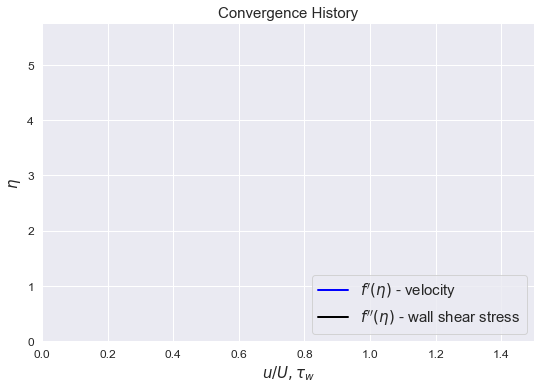

In [105]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
fig.tight_layout(rect=(0.05,0.05,0.9,0.9))

ax.set_xlim((0, 1.5))
ax.set_ylim((0, 5.75))

plotlays, plotcols = [2], ["blue","black"]
labels = [r'$f^{\prime}(\eta)$ - velocity', r'$f^{\prime\prime}(\eta)$ - wall shear stress']
lines = []
for index in range(2):
    lobj = ax.plot([],[],lw=2,color=plotcols[index],label=labels[index])[0]
    lines.append(lobj)
ax.set_title("Convergence History", fontsize=15) 
ax.legend(loc=4, fontsize=15)
ax.set_xlabel(r'$u / U, \tau_w$', fontsize=15.0)
ax.set_ylabel(r'$\eta$', fontsize=15.0)    

ax.spines['top'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)
ax.spines['left'].set_linewidth(1.0)
ax.spines['right'].set_linewidth(1.0)
ax.minorticks_on()
ax.tick_params(which='major', length=3, width=1, labelsize=12.0, pad=5)
ax.tick_params(which='minor', length=2, width=1)

In [106]:
# initialization function: plot the background of each frame
def init():
    for line in lines:
        line.set_data([],[])
    return lines

In [107]:
# animation function. This is called sequentially
def animate(i):
    fn = solution_history[i]
    n = 1
    for line in lines:
        line.set_data(fn[:,n], eta)
        n += 1
    return lines



In [108]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(solution_history), 
                              interval=800, blit=True, repeat_delay=80000)

In [109]:
HTML(anim.to_html5_video())

# References

The data and discussion of the Blasius equation for laminar, boundary-layer flow used information from the following references:

- White, Frank M. *Viscous Fluid Flow.* McGraw-Hill, International Edition, 2nd ed., (1991) p. 233-234.


- Hellevik, Leif Rune. *Numerical Methods for Engineers* (2020), http://folk.ntnu.no/leifh/teaching/tkt4140/._main000.html